Code to study the real structure of Hierchical Networks. Networks are loaded then a range of data on the networks are plotted. 

In [1]:
using Graphs, GraphIO, GraphPlot, SparseArrays



In [2]:
using GraphPlot

In [3]:
#gplot(g, layout="circular_layout")

In [4]:
#Function to calculate Tau as in Looplessness Paper, PNAS, Johnson et al.


function tau(A, F,L,N)
    
    eta_sqaured = F/ (1- F)
    
    expect_term = 0
    
    w_in = vec(sum(A, dims=1))
   
    w_out= vec(sum(A, dims=2))
    
    
    alpha = dot(w_in, w_out)/L
    
    if 0 in w_in
        
        L_B=0
        
        for a in 1:N
            
            if w_in == 0
              L_B = L_B + w_out[a]  
                
            end
        end
        
        
         expect_term = 1/(2*(L/L_B -1))   
            
            
        end 
    
    
    tau = log(alpha)  - 1/(2*eta_sqaured) + expect_term
    
    
    return tau,alpha
    
    end 

tau (generic function with 1 method)

In [5]:
#Function to calculate Trophic levels


using LinearAlgebra, IterativeSolvers, Statistics

function get_levels(A)
    
    A= convert(Array{Float64}, A)
    
    w_in = vec(sum(A, dims=1))
   
    w_out= vec(sum(A, dims=2))
    
   
    
    u = w_in + w_out 
    
    v= w_in - w_out 
   
    Lambda=  diagm(u)-  A - transpose(A)
    
   
    Lambda[1,1]= 0 
    
    h= bicgstabl(Lambda, v, 10)
    #h=  lsmr(Lambda, v)   
    #h= Lambda \ v   
    h= h .- minimum(h)
    
    return h
end

get_levels (generic function with 1 method)

In [6]:
#Function to calculate Trophic Incohrence 


function calc_troph_incoh(A)
    
    F=0

    for (x,y,v) in zip(findnz(A)...)
  
    
        F = F + v*(h[y] - h[x] -1 )^2
        
    end
    
    F= F/sum(A)
    
end
    
    
    
    
    

calc_troph_incoh (generic function with 1 method)

In [7]:
using SparseArrays




In [249]:
using LinearAlgebra, Pseudospectra
using Arpack, SparseArrays


ϵ= 10^(-8)


#T_list= LinRange(0.025, 8, number)

#Data_lists

#T_list= [1000000]
#T_list= 1000000*ones(number)
B=0

F_list = zeros(0)
alpha_list =zeros(0)
num_diff_list= zeros(0)

tau_list= zeros(0)
cond_list =zeros(0)

strong_list = zeros(0)
second_strong_list=zeros(0)
eig_list= zeros(0)

eig_list_num_abs = zeros(0)

weak_list_before=zeros(0)
weak_list_after=zeros(0)
h_max_list= zeros(0)

pr_ipr_list= zeros(0)

gap_list = zeros(0)
scale_spec_list = zeros(0)
entropy_list=zeros(0)
nu_normal_list= zeros(0)
spacing_list=zeros(0)
ipr_list= zeros(0)
A= zeros(0,0)
h=0
sorted=zeros(0)
corr_list= zeros(0)
diffs= zeros(0)

N_list= zeros(0)
pr_ent_list=zeros(0)


avg_diffs=zeros(0)
avg_diffs2=zeros(0)
h_eig_list= zeros(0)

h_dist_list= zeros(0)

L_list= zeros(0)
eig_cent_corr= zeros(0)

pseudo_spec= zeros(0)
EE_list= zeros(0)
return_list = zeros(0)
#stop = 5



#Loading graphs from folders. This Depends on your directory setup 
all_folders = readdir("path to folder")
print(all_folders)

number=(size(all_folders))[1]

#Loop which avoids bugged mac .DS_stores file. Only a problem for me 
for n in 2:number
    
  
  
    
println(n)   
folder =  string("path to folfer ", all_folders[n])
#f=open("net_celegans_neural.dat")
#net_moreno_highschool.dat
#Ythan96.dat
#el_verde.dat

file_list= readdir(folder)
foldersize = size(file_list)[1]
    
for f in 1:Int(foldersize)
 
        
        
file=  string(folder,"/", file_list[f])       

#higgs-social_network.edgelist
#web-Stanford.txt
#wiki-Talk.txt
#amazon0312.txt
g = loadgraph(file, "SimpleDiGraph", EdgeListFormat())
    
    
    
A = (adjacency_matrix(g))
    
L=sum(A)
    
N=nv(g)    

    
    
#A= transpose(A)
   
        

L=sum(A)
    
    
    
  spacing= zeros(N)
 
    
    
    

#Getting all the data.   
    
    
h = get_levels(A)
    
F= calc_troph_incoh(A)    
append!( F_list, F )  
    
#println(maximum(real(eigvals(Matrix(A)))))

eigs=  eigvals(Matrix(A))   
eigs_vecs = eigvecs(Matrix(A))
    


EE = real(sum(exp.(((eigs)))))

     
G_und= SimpleGraph(SimpleDiGraph(A))    
   
    
eigs_undir= eigvals(Matrix(adjacency_matrix(G_und))) 
EE_undir = sum(exp.(eigs_undir))
    
append!(EE_list, EE)    

returnablity= (EE - N)/(EE_undir - N)

        
#pr = pagerank(g, 0.85, 1000, 1.0e-10)

pr =  pagerank(g, 0.85, 100, 1.0e-6)  
    
pr = filter(!iszero, pr)
    
pr = pr*(1/(sum(pr)))
ent_pr = sum(-pr.*(log.(pr)))/log(N)
        
        
      

append!(pr_ipr_list,(sum(pr.^4))/((sum(pr.^2))^2) )         
        
        
append!(pr_ent_list,ent_pr)         
    
append!(return_list, returnablity)
sorted= reverse(sort!(abs.(eigs)))
println(sorted[N])
gap = (sorted[1]- sorted[2])/sorted[1]
#gap = (sorted[1]- sorted[2])    
append!(gap_list,gap)
entropy= zeros(0)
ipr= zeros(0)
h_max = maximum(h)

corr = norm(abs.(eigvecs(Matrix(transpose(A)))).*(abs.(eigs_vecs)))
    
#corr = sum(abs.(eigvecs(Matrix(transpose(A)))).*(abs.((eigs_vecs))))

append!(corr_list, corr)
   
append!(h_eig_list, abs.(eigs_vecs[:,N]) )    
append!(h_dist_list, h./h_max )     

for k in 1:(N)
        
        #println((sum(vec1.^2)))
        vec= abs2.(eigs_vecs[:,k])
        vec = filter(!iszero, vec)
        ent = sum(-vec.*(log.(vec)))/log(N)
        
        
        vec1= abs.(eigs_vecs[:,k])
        #vec1 = filter(!iszero, vec)
        
       
       
        #ratio= (sum(vec1.^4))/((sum(vec1.^2))^2)
        
        ratio= (sum(vec1.^4))
       
        append!(entropy,ent)
        append!(ipr,ratio)
    end  

(gaps= (zeros(ComplexF64,N,N)))   
for a in 1:N
        for b in 1:N
        
        gaps[a,b]= eigs[a] - eigs[b]
    
    
    
            end 
    end

gaps= abs.(gaps)
    

for c in 1:N
        
        
        sorted = sort(gaps[c,:])
        spacing[c] = sorted[2]/(sorted[3]  + 0.00000000000000000000001)  
    
        end    
    
append!(spacing_list, var(spacing))    

append!(L_list,L/N) 
        
append!(N_list,N) 

append!(entropy_list,mean(entropy))
append!(ipr_list, mean(ipr)) 
    

spec_rad=  maximum(real(eigs))   
    
scale_fac=   maximum(real(eigvals(Matrix(A)*transpose(Matrix(A)))))  
    

    
nu= sum(abs2.(eigs))/norm(A,2)^2
#A= Matrix(A)    
A= convert(Array{Float64}, A)
    

    
   
    
#append!(cond_list, cond(A,2)) 
    
#append!(pseudo_spec,psa_radius(A, ϵ)[1])
append!( eig_list, spec_rad )  
#psa_radius(A,ϵ)    
    
append!(scale_spec_list, (spec_rad/sqrt(scale_fac)))
    
append!( eig_list_num_abs , maximum(real(eigvals((Matrix(A) + transpose(Matrix(A)))/2))  ))    
   
append!(h_max_list, maximum(h))  
    
tau_1,alpha = tau(A, F,L,N)
append!(alpha_list, alpha)
append!(tau_list, tau_1)  
     
append!(nu_normal_list, nu)
        
strong = strongly_connected_components(g)          


max= maximum(size.(strong))[1]/N

append!(strong_list, max)
    
if max<1    

append!(second_strong_list, collect(sort(size.(strong), rev=true)[2])[1]/N )
        
    
else
    
    append!(second_strong_list,0)
    
end        
        
        

 
diffs= zeros(0)

#edges_1= []
#edges_2=[]
println(sum(A)/N^2)
append!(eig_cent_corr, sum(eigenvector_centrality(g).*(eigenvector_centrality(SimpleDiGraph(((transpose(A))))))))
 
g1= copy(g)
        
weak = weakly_connected_components(g1)
append!(weak_list_before, maximum(size.(weak))[1]/N)

for (x,y,v) in zip(findnz(A)...)
  
    
        d= (h[y] - h[x] )
        
         
    
        append!( diffs, d )
    
       if d<0
                
        rem_edge!(g1, x,y )
        #println("removed")
        
            end
        
    end  
        
weak = weakly_connected_components(g1)
append!(weak_list_after, maximum(size.(weak))[1]/N)
   
 #num_diff=  count(p->(p>= 0), diffs)    
    
    num_diffs= sum(diffs .<= 0)/length(diffs)
    #num_diffs= 1
append!( num_diff_list, num_diffs )


#append!(avg_diffs2, mean(diffs.^2))
#append!(avg_diffs, mean(diffs.^3))

#println((diffs))
    end
end

println(F_list)




[".DS_Store", "FoodWebs", "Genetic", "Language", "Metabolic", "Neural", "Social", "Trade"]2
0.0
0.040479001517962555
0.0
0.050703082747431044
0.0
0.0639429606156632
0.0
0.04774305555555555
0.0
0.029359254116246777
0.0
0.03745541022592152
0.0
0.060240963855421686
0.0
0.06220372297375419
0.0
0.08437418115119225
0.0
0.05002834467120181
0.0
0.06879340277777778
0.0
0.06549354435651812
0.0
0.0616370808678501
0.0
0.04199472910731439
0.0
0.03111111111111111
0.0
0.0307478674866098
0.0
0.039612097304405
0.0
0.0440499671268902
0.0
0.0663265306122449
0.0
0.05234375
0.0
0.07140248356464572
0.0
0.05601796802748051
0.0
0.03052791364479676
0.0
0.04292929292929293
0.0
0.06584965429145824
0.0
0.05874479476502082
0.0
0.2413793103448276
0.0
0.1712
0.0
0.030865051903114185
0.0
0.06699346405228758
0.0
0.0643057168226214
0.0
0.07075962539021852
0.0
0.31153388822829964
0.0
0.0628095733610822
0.0
0.026068261220102123
0.0
0.1177930056710775
0.0
0.2224
0.0
0.2248037173529883
0.0
0.3152
0.0
0.0959201388888889
0.0

Plotting all the required data with type listed in the figure captions.

In [251]:
using Plots

#histogram(diffs, xlabel= "Level Differences", ylabel="Frequency", title=(string("N=1000 k=10 F=",  string(round(F,digits = 3) ))))

#savefig("Generated_Level_distribution_high.pdf")

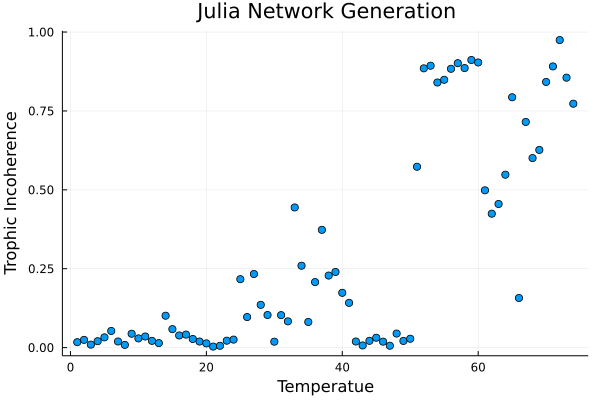

In [252]:
using Plots

plot(F_list, seriestype = :scatter, legend = false, xlabel= "Temperatue",

ylabel="Trophic Incoherence", title= "Julia Network Generation")

#savefig("Julia_generation_2.pdf")

In [307]:

using Polynomials, SpecialFunctions

x=F_list

y= num_diff_list


plot(F_list, num_diff_list, seriestype = :scatter, legend = :topleft, xlabel= "Trophic Incoherence",

ylabel="Fraction of Backwards Edges", label= "Real Networks")



F_plot= LinRange(0, 1, 1000)


arg= - sqrt.(-F_plot .+1)./(F_plot*(2)) 

erf_function= 0.5*(1 .+ erf.(arg))

plot!(F_plot,  erf_function , label= "ERF Approx", lw=3)

#quadfit=Polynomials.fit(x,y,1)
#plot!(quadfit,x[1],x[end],label="Linear Fit", lw = 3)

#savefig("Good_Error_function_approx_backwars_edges_real.pdf")


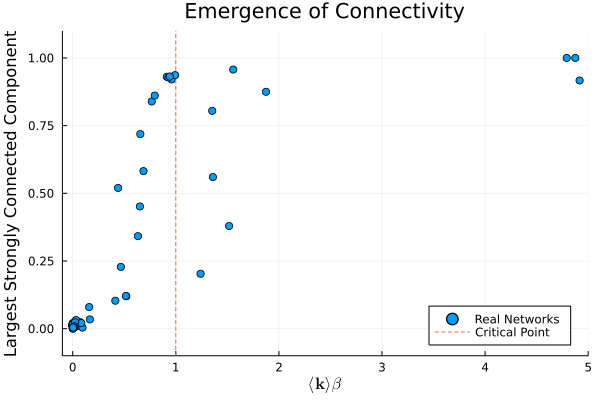

In [306]:
#plot(( num_diff_list.*L_list ) , strong_list,legend=:bottomright,seriestype = :scatter,ylabel="Largest Strongly Connected Component", xlabel="Mean Degree*Beta",title="Emergence of Connectivity",xlim=(-0.1,10),label="Real Networks")


F_plot= LinRange(0.000001, 10, 1000)
plot(( num_diff_list.*L_list ) , strong_list,legend=:bottomright,seriestype = :scatter,ylabel="Largest Strongly Connected Component", xlabel=L"\textbf{\langle k \rangle \textbf{\beta}}",title="Emergence of Connectivity",label="Real Networks",  xlim=(-0.1,5))

plot!(sign.(F_plot), F_plot .-5, ylim=(-0.1,1.1), linestyle=:dash, label="Critical Point") 

#savefig("Good_Connectivity_Real_Networks_Beta_mean_degree_crit_line_2_no_zoom.pdf")

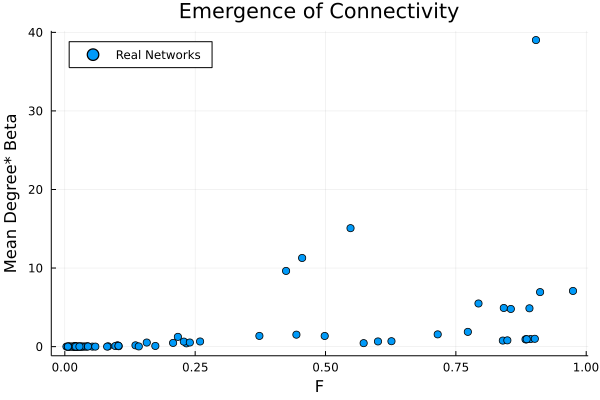

In [255]:
plot(( F_list , num_diff_list.*L_list ),legend=:topleft,seriestype = :scatter,ylabel="Mean Degree* Beta", xlabel="F",title="Emergence of Connectivity",label="Real Networks")

#savefig("Beta_mean_degree_tau.pdf")

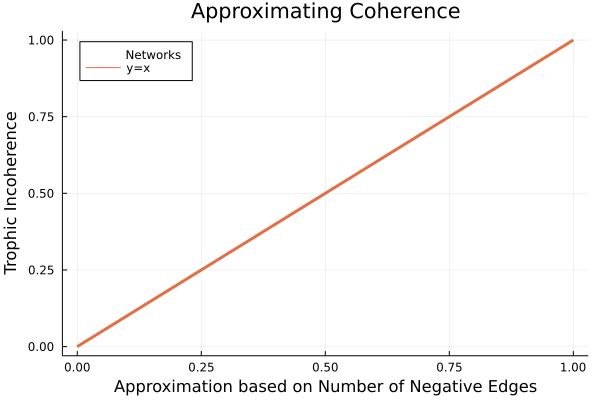

In [256]:
y= F_list

#x = 2*num_diff_list.*avg_diffs .- avg_diffs .+ 1

x =   -avg_diffs2  .+1

line= LinRange(0, 1, 1000)

plot(line,line)

plot(x, y, seriestype = :scatter, legend = legend = :topleft, ylabel= "Trophic Incoherence",

xlabel="Approximation based on Number of Negative Edges", title= "Approximating Coherence", label= "Networks")


plot!(line,line, label="y=x", lw = 3)



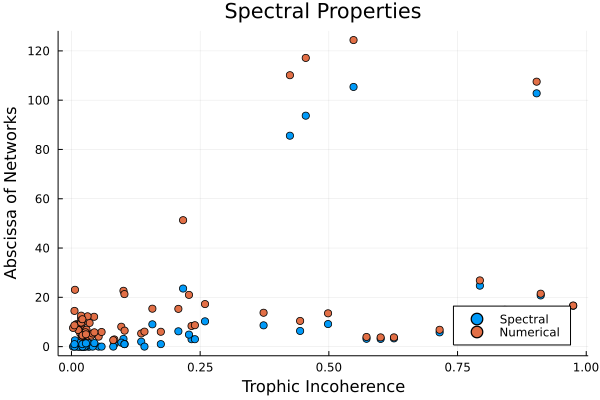

In [257]:
#println(eig_list)

plot(F_list, eig_list, seriestype = :scatter, legend = :bottomright, xlabel= "Trophic Incoherence",

ylabel="Abscissa of Networks", title= "Spectral Properties", label= "Spectral" )

plot!(F_list, eig_list_num_abs, seriestype = :scatter, label = "Numerical")
#savefig("Abscissa_of_Networks.pdf")

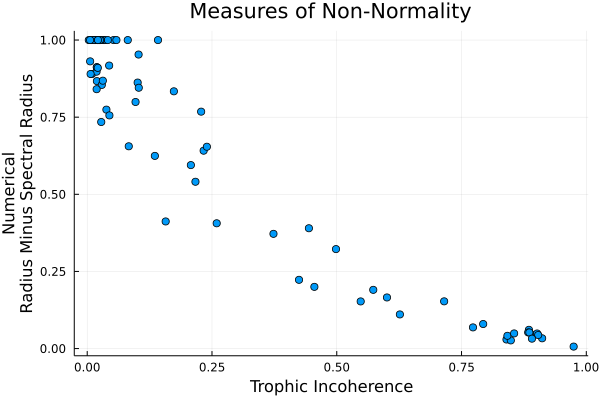

In [258]:
plot(F_list, (eig_list_num_abs -eig_list) ./(eig_list_num_abs) , seriestype = :scatter, legend = false, xlabel= "Trophic Incoherence",

ylabel="Numerical
Radius Minus Spectral Radius", title= "Measures of Non-Normality")
#savefig("Real_networks_Other_Non_normality_measure_Networks.pdf")

In [259]:
#plot(F_list, (cond_list), seriestype = :scatter, legend = false, xlabel= "Trophic Incoherence",
    #ylabel="Conidtion Number" , yaxis=:log)

#savefig("Condition_number_N_500.png")

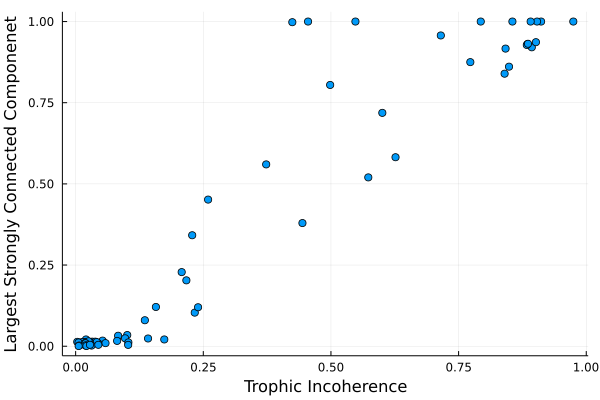

In [260]:
plot(F_list, strong_list, seriestype = :scatter, legend=:false, ylabel="Largest Strongly Connected Componenet"

,xlabel= "Trophic Incoherence")

#savefig("GRS3_Real_F_strong_comp.pdf")

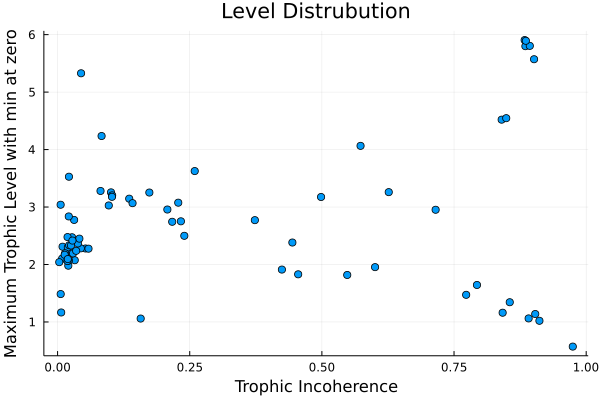

In [261]:
plot(F_list, h_max_list, seriestype = :scatter, legend = false, xlabel= "Trophic Incoherence",

ylabel="Maximum Trophic Level with min at zero", title= "Level Distrubution", label= "Spectral" )

#savefig("Maximum_Level_Numerical_Networks.pdf")



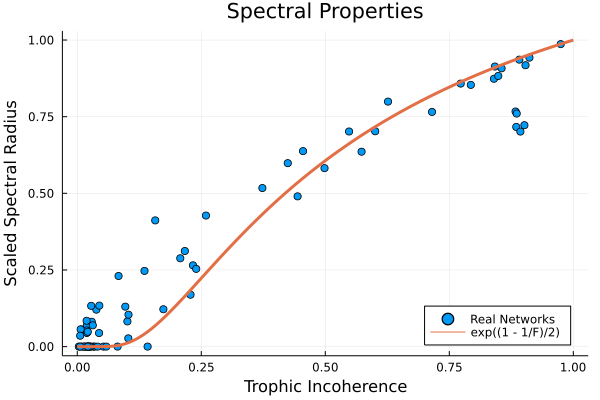

In [262]:
plot(F_list, scale_spec_list, seriestype = :scatter, legend = :bottomright, xlabel= "Trophic Incoherence",

ylabel="Scaled Spectral Radius", title= "Spectral Properties", label= "Real Networks" )

F_plot= LinRange(0, 1, 1000)

plot!(F_plot,  exp.(((1 .- 1 ./ F_plot))/2), label= "exp((1 - 1/F)/2)", lw=3)

#savefig("GRS3_Spec_radius_parameter.pdf")

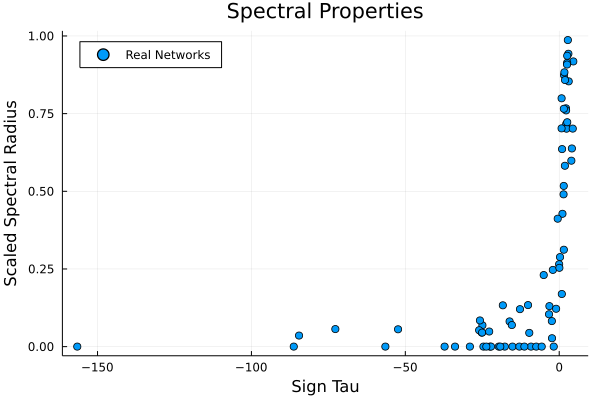

In [263]:
plot((tau_list), scale_spec_list, seriestype = :scatter,  xlabel= "Sign Tau",

ylabel="Scaled Spectral Radius", title= "Spectral Properties", label= "Real Networks" ,legend=:topleft)

#F_plot= LinRange(0, 1, 1000)

#plot!(F_plot,  exp.(((1 .- 1 ./ F_plot))/2), label= "exp((1 - 1/F)/2)", lw=3)

#savefig("Real_tau_scaled_spec_radius.pdf")

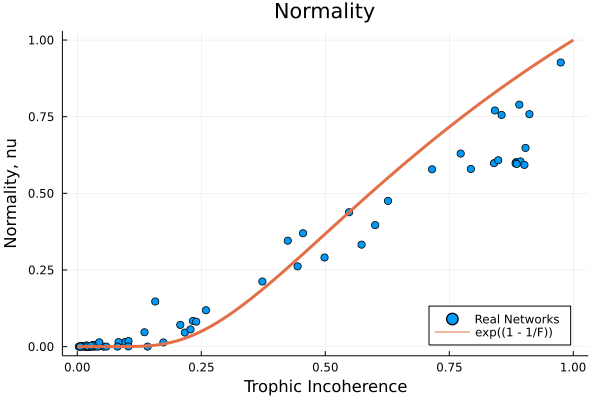

In [264]:
plot(F_list, nu_normal_list, seriestype = :scatter, legend = :bottomright, xlabel= "Trophic Incoherence",

ylabel="Normality, nu", title= "Normality", label= "Real Networks" )



plot!(F_plot,  exp.(((1 .- 1 ./ F_plot))), label= "exp((1 - 1/F))", lw=3)

#savefig("Real_networks_nu_normlity_test.pdf")

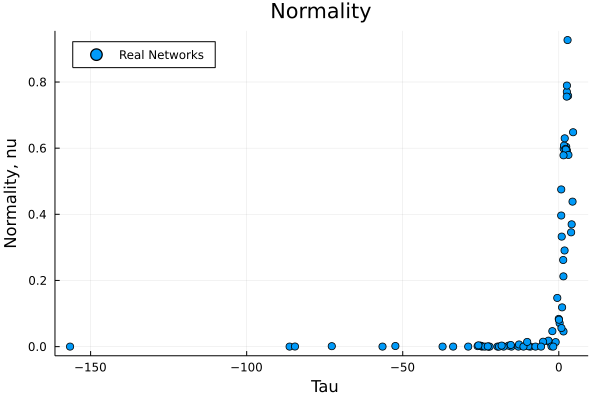

In [265]:
plot((tau_list), nu_normal_list, seriestype = :scatter, legend = :topleft, xlabel= " Tau",

ylabel="Normality, nu", title= "Normality", label= "Real Networks" )



#plot!(F_plot,  exp.(((1 .- 1 ./ F_plot))), label= "exp((1 - 1/F))", lw=3)

#savefig("Real_normality_tau_sign.pdf")

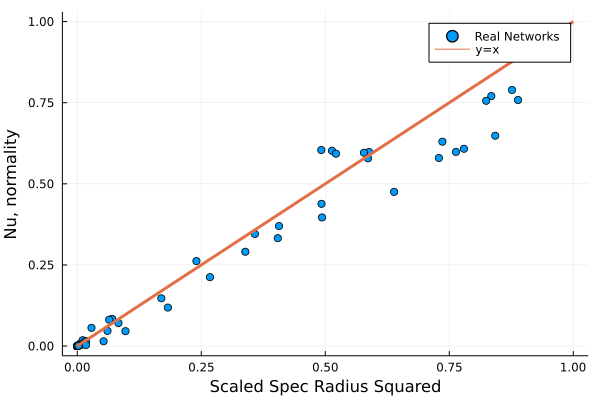

In [266]:
plot(scale_spec_list.^2 , nu_normal_list, seriestype = :scatter, label= "Real Networks", legend = :best, xlabel="Scaled Spec Radius Squared"

,ylabel = "Nu, normality")

plot!(line,line, label="y=x", lw = 3)

#savefig("Real_networks_nu_normlity_analysis.pdf")

In [267]:
pseudo_spec

plot(F_list, pseudo_spec, seriestype = :scatter, legend = :false, xlabel= "Trophic Incoherence",

ylabel="Pseudo Spectral Radius", )


DivideError: DivideError: integer division error

In [268]:


using LaTeXStrings

plot(F_list, ((pseudo_spec -eig_list)/ϵ), seriestype = :scatter, legend = :false, xlabel= "Trophic Incoherence",

ylabel=L" \frac {\rho_\epsilon(A) - \rho(A)}{\epsilon} " ,yaxis=:log )


#savefig("Pseduo_spec_data_N_500.png")

LoadError: DimensionMismatch("dimensions must match: a has dims (Base.OneTo(0),), b has dims (Base.OneTo(74),), mismatch at 1")

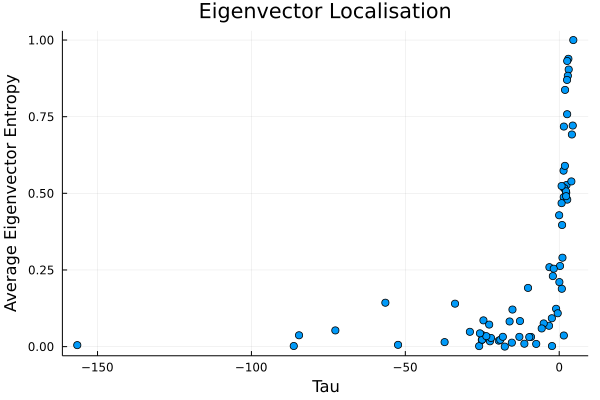

In [269]:
plot((tau_list), entropy_list/maximum(entropy_list), seriestype = :scatter,legend=false ,xlabel= "Tau",

ylabel="Average Eigenvector Entropy",title="Eigenvector Localisation")

#savefig("Real_Tau_Entropy_Eigenvector_localisation.pdf")

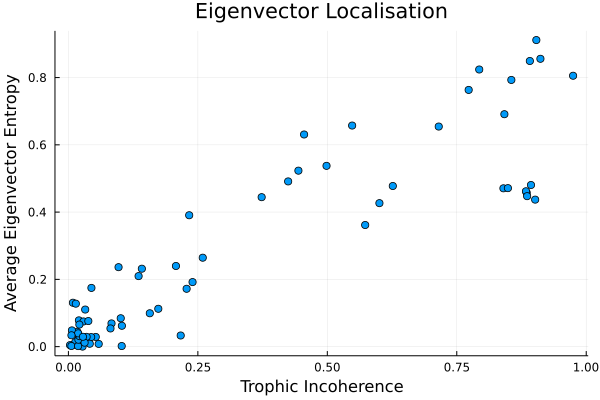

In [270]:
plot(F_list, entropy_list, seriestype = :scatter,legend=false ,xlabel= "Trophic Incoherence",

ylabel="Average Eigenvector Entropy",title="Eigenvector Localisation")

#savefig("Real_networks_Entropy_Eigenvector_localisation_tests.pdf")

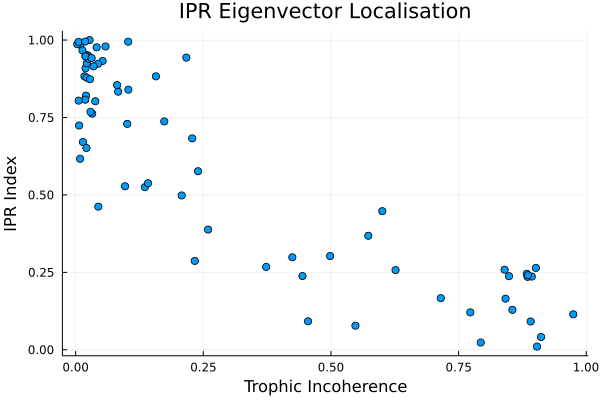

In [271]:
plot(F_list, (ipr_list), seriestype = :scatter,legend=false ,xlabel= "Trophic Incoherence",

ylabel="IPR Index",title="IPR Eigenvector Localisation" )

#savefig("Real_networks_IPR_localisation_IPR_tests.pdf")

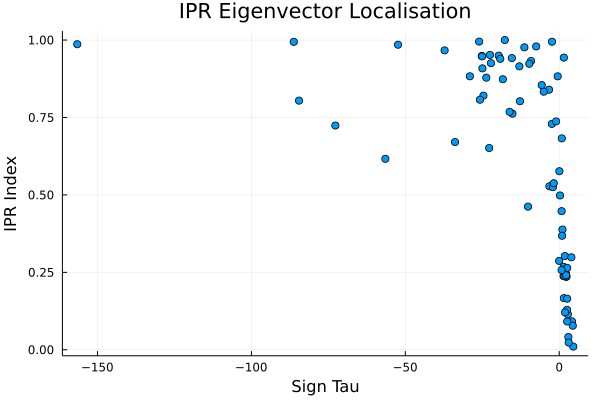

In [272]:
plot((tau_list), (ipr_list), seriestype = :scatter,legend=false ,xlabel= "Sign Tau",

ylabel="IPR Index",title="IPR Eigenvector Localisation" )

#savefig("Real_Tau_IPR_localisation_IPR.pdf")

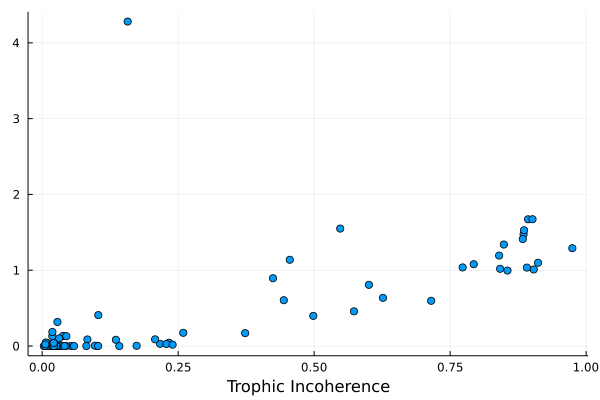

In [273]:
plot(F_list, corr_list, seriestype = :scatter,legend=false ,xlabel= "Trophic Incoherence",

ylabel="")



#savefig("Real_networks_Eigenvector_corrleation_outlier_removed.png")

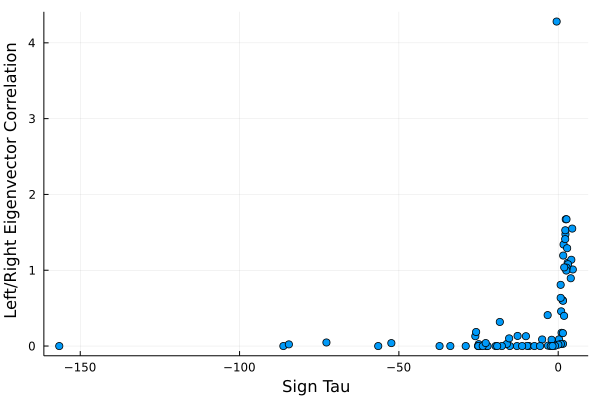

In [274]:
plot((tau_list), corr_list, seriestype = :scatter,legend=false ,xlabel= "Sign Tau",

ylabel=" Left/Right Eigenvector Correlation")

#savefig("Real_Tau_Eigenvector_corrleation.pdf")

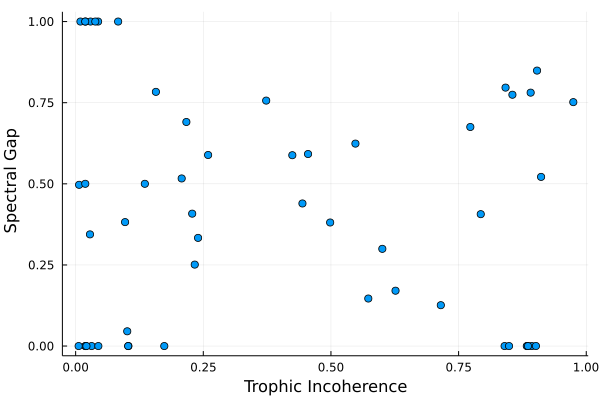

In [275]:
plot(F_list, gap_list, seriestype = :scatter,legend=false ,xlabel= "Trophic Incoherence",

ylabel=" Spectral Gap")

#savefig("Real_networks_Spectral_Gap_scaled_new.png")

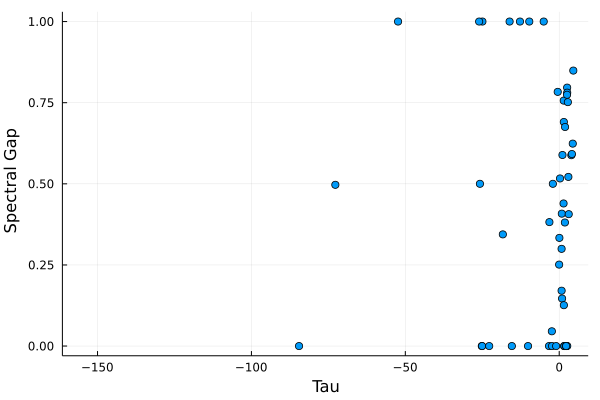

In [276]:
plot((tau_list), gap_list, seriestype = :scatter,legend=false ,xlabel= "Tau",

ylabel=" Spectral Gap")

#savefig("Real_Tau_Spectral_Gap_N_500_scaled_new.pdf")

In [277]:
#plot(h_dist_list,h_eig_list , seriestype = :scatter,legend=false ,xlabel= "Trophic Level of Node scaled by max level",

#ylabel="  Principle Eigenvector of Node", title= "High Incoherence F approx 0.95")

#savefig("Principle_eigenvector_levels_high_incoherence.png")




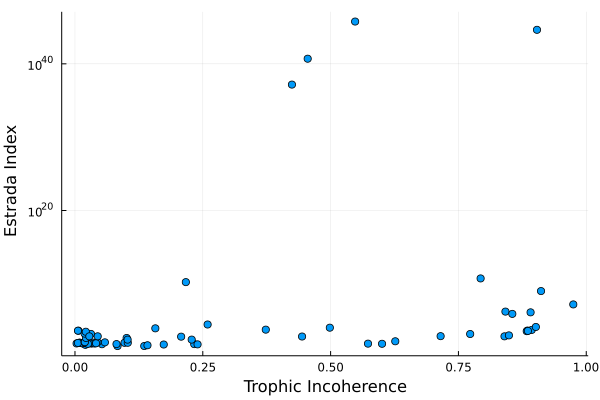

In [278]:
plot(F_list, EE_list, seriestype = :scatter,legend=false ,xlabel= "Trophic Incoherence",

ylabel=" Estrada Index", yaxis=:log)

#savefig("EE_Index_log_N_500.png")

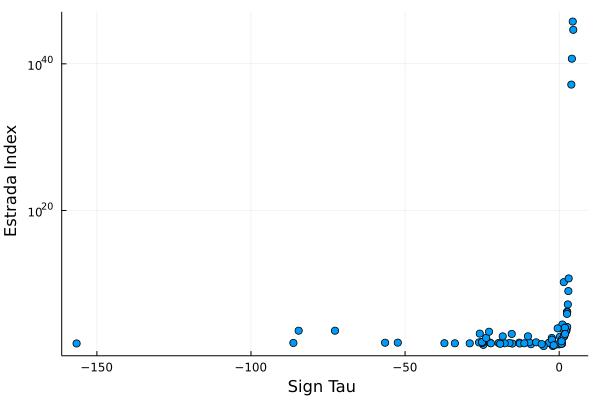

In [279]:
plot((tau_list), EE_list, seriestype = :scatter,legend=false ,xlabel= "Sign Tau ",

ylabel=" Estrada Index", yaxis=:log)

#savefig("Real_Tau_Estrada_Index.pdf")

In [280]:
plot(F_list, return_list, seriestype = :scatter,legend=false ,xlabel= "Trophic Incoherence",

ylabel=" Returnablity based on Estrada Index", yaxis=:log)

#savefig("Returnablity_index_N500_k_10.pdf")

┌ Warning: No strict ticks found
└ @ PlotUtils /Users/niallrodgers/.julia/packages/PlotUtils/NE7U1/src/ticks.jl:191
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/niallrodgers/.julia/packages/PlotUtils/NE7U1/src/ticks.jl:191
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/niallrodgers/.julia/packages/Plots/SkUg1/src/utils.jl:91


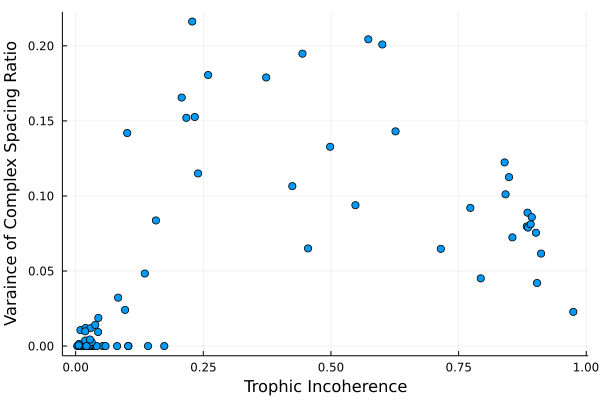

In [281]:
plot(F_list, spacing_list, seriestype = :scatter,legend=false ,xlabel= "Trophic Incoherence",

ylabel="Varaince of Complex Spacing Ratio")

#savefig("Real_networks_Varaince_Spacing_ratio_spacing_ratio.pdf")

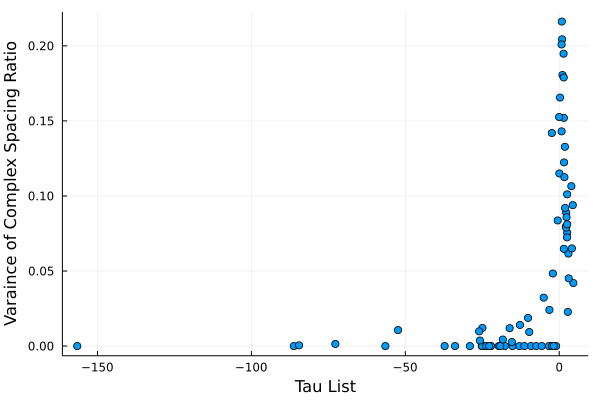

In [282]:
plot(tau_list, spacing_list, seriestype = :scatter,legend=false ,xlabel= "Tau List",

ylabel="Varaince of Complex Spacing Ratio")

#savefig("Real_Tau_Varaince_Spacing_ratio_spacing_ratio.pdf")

In [283]:
print(F_list)

[0.017226510486502606, 0.02453266497849201, 0.009430595922904569, 0.02029603666555437, 0.032449872977481066, 0.05279666041973874, 0.019394391896221237, 0.008724040921983716, 0.04397093162088471, 0.029173111600725932, 0.035169290251649415, 0.021441000890044665, 0.0143027866433524, 0.10105583880808026, 0.05849469766913416, 0.03847169273195701, 0.04123213448187139, 0.02730026789972045, 0.01923590939672222, 0.013396087073676694, 0.0031943358490756297, 0.005778946581333524, 0.021942072120235103, 0.025341988383169728, 0.2168688646562777, 0.09683596944833972, 0.2332805578397525, 0.13553825674937275, 0.10327482020642806, 0.018725295197830175, 0.10292475957712412, 0.08323510304157605, 0.4441824449936127, 0.25944311113589535, 0.08124287621427888, 0.20768514408527916, 0.3732008367968549, 0.22828982490733601, 0.2397702474015504, 0.1736181857143657, 0.1418207475554375, 0.01930552064906147, 0.006818570223261763, 0.021515820711838444, 0.031283465209346994, 0.018864931301477553, 0.005889627719148025, 

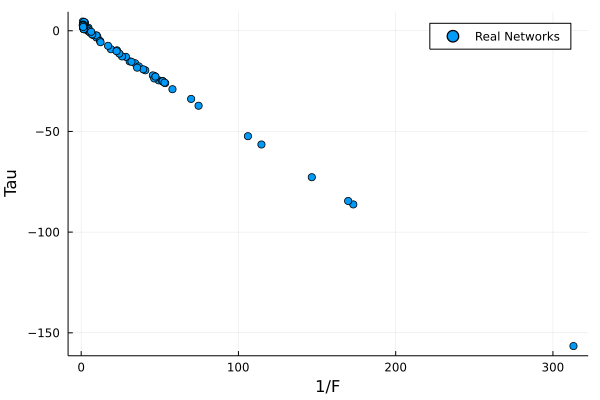

In [284]:
plot(F_list.^-1,tau_list, seriestype = :scatter, legend=true, ylabel="Tau", xlabel="1/F", label="Real Networks")

#savefig("Tau_versus_1_over_F_real.pdf")

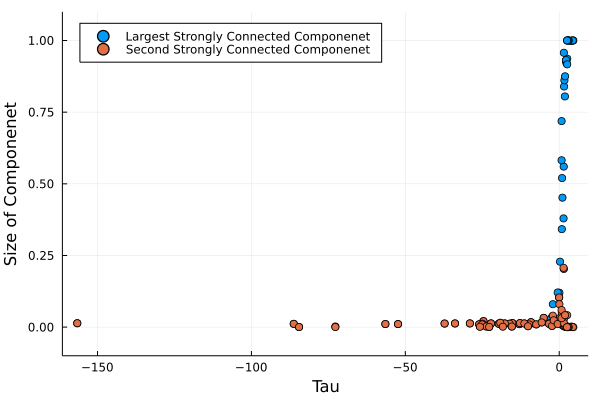

In [285]:
plot(tau_list, strong_list, seriestype = :scatter, label="Largest Strongly Connected Componenet",legend=:topleft,ylim=(-0.1,1.1))

plot!(tau_list, second_strong_list, seriestype = :scatter, label="Second Strongly Connected Componenet", xlabel="Tau", ylabel="Size of Componenet")

#savefig("Second_largest_component_real_networks.pdf")

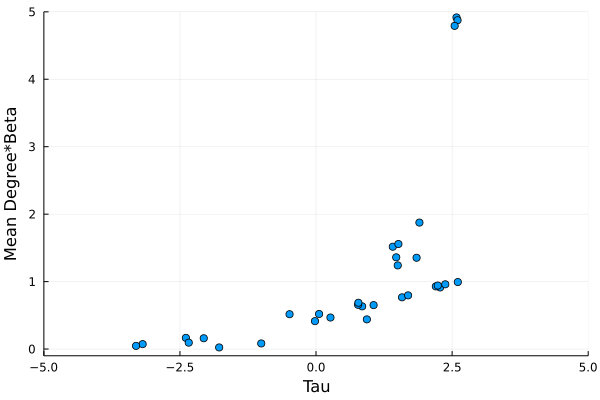

In [286]:
plot(tau_list, ( num_diff_list.*L_list) , seriestype = :scatter, xlabel="Tau", ylabel="Mean Degree*Beta", label=false,xlim=(-5,5),ylim=(-0.1,5))

#savefig("real_mean_degree_tau_zoom.pdf")

In [301]:
x_plot= LinRange(2, 100, 1000)


L_s= zeros(0)

L_w = zeros(0)

F_s =  zeros(0)

F_w =zeros(0)


for a in 1:(size(F_list)[1])
    
    
    if strong_list[a]>0.9
    
    append!(L_s, L_list[a])
    append!(F_s, F_list[a])
        
    
        else 
        
        
        
        append!(L_w, L_list[a])
        append!(F_w, F_list[a])
    end
    end 


plot(x_plot,  (1 .+ 2*((erfinv.(2*((x_plot).^-1) .-1)).^2)).^-1,lw=4, label="Prediction of Critical F", color="black", ylabel="Trophic Incoherence", xlabel="Mean Degree")


plot!(L_w,F_w, seriestype = :scatter, label="Weakly Connected Networks",color="red")
plot!(L_s,F_s, seriestype = :scatter, label="Strongly Connected Networks", color="blue",  legendfontsize=6, legend=:bottomright)
#savefig("Good_Critical_F_connectivty.pdf")

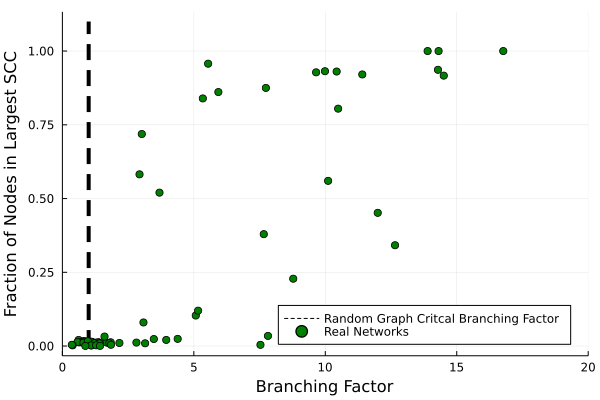

In [311]:
y_plot= LinRange(0, 1.1, 1000)


plot(1 .+ 0*y_plot , y_plot, lw=4, label="Random Graph Critcal Branching Factor", color="black", linestyle=:dash, colour="black")


plot!(alpha_list, strong_list, seriestype = :scatter, legend=:bottomright, ylabel="Fraction of Nodes in Largest SCC", xlabel="Branching Factor", colour="green",label="Real Networks",xlim=(0,20) )


#savefig("Good_Branching_Factor_Real_networks_all.pdf")



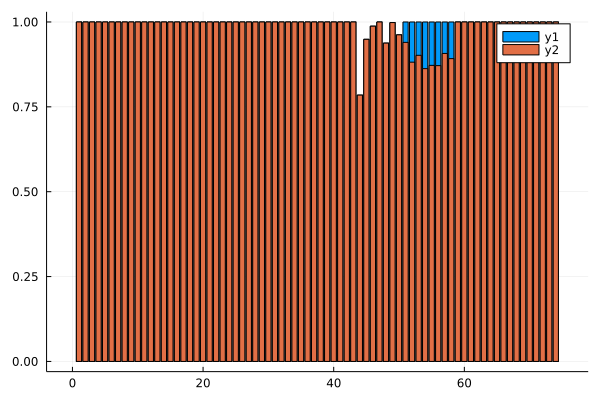

In [289]:
size(weak_list_before)[1]


weak = (hcat(weak_list_before, weak_list_after))

bar(1:size(weak_list_before)[1], weak, legend=true)
#bar!(weak_list_after, legend=false)

In [290]:
weak[1,:]

2-element Vector{Float64}:
 1.0
 1.0

In [295]:
using StatsPlots

group = repeat(["Before Removing Back Edges", "After Removing Back Edges"],inner=74)

groupedbar( [weak_list_before weak_list_after], group = group, legend=:bottomright, xlabel="Network Id", ylabel="Size of Largest Weakly Connected Compoent", c = [:pink :green])


#savefig("good_weak_connectivity_all.pdf")


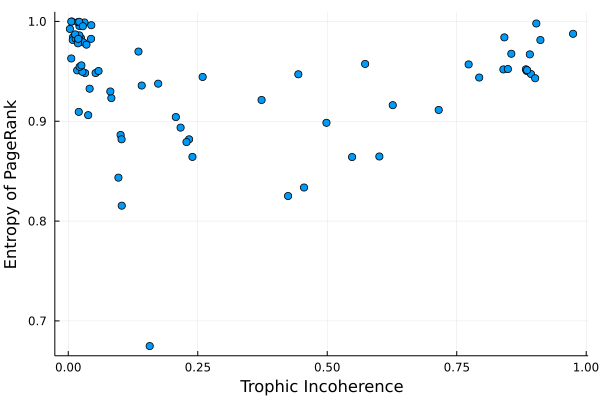

In [292]:
plot(F_list, pr_ent_list, seriestype = :scatter, xlabel="Trophic Incoherence", ylabel="Entropy of PageRank",label=false)

#savefig("Real_networks_pagerank_entropy_test.pdf")

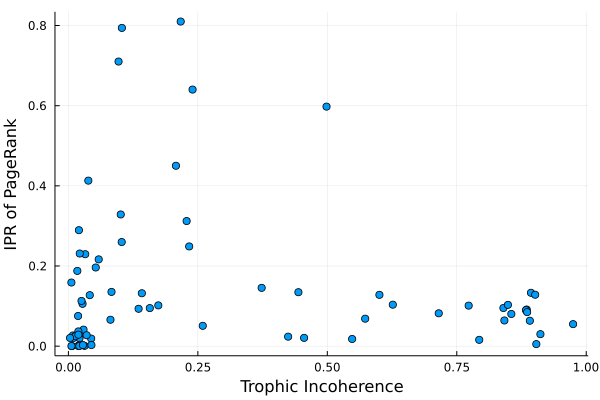

In [293]:
plot(F_list, pr_ipr_list, seriestype = :scatter, xlabel="Trophic Incoherence", ylabel="IPR of PageRank",label=false)

#savefig("Real_networks_pagerank_ipr_test.pdf")

In [296]:
plot((F_list), eig_cent_corr, seriestype = :scatter,legend=false ,xlabel= "Trophic Incoherence",

ylabel="Correlation of Left and Right Eigenvector" )

#savefig("Principle_eigen_vecs_real_correlation.pdf")